In [ ]:
pip install --quiet lucid==0.2.3

In [1]:
%tensorflow_version 1.x

UsageError: Line magic function `%tensorflow_version` not found.


In [2]:

# Imports

import numpy as np
import tensorflow as tf
assert tf.__version__.startswith('1')

import lucid.modelzoo.vision_models as models
from lucid.misc.io import show
import lucid.optvis.objectives as objectives
import lucid.optvis.param as param
import lucid.optvis.render as render
import lucid.optvis.transform as transform

In [3]:

# Let's import a model from the Lucid modelzoo!

model = models.InceptionV1()
model.load_graphdef()

The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



The TensorFlow contrib module will not be included in TensorFlow 2.0.
For more information, please see:
  * https://github.com/tensorflow/community/blob/master/rfcs/20180907-contrib-sunset.md
  * https://github.com/tensorflow/addons
  * https://github.com/tensorflow/io (for I/O related ops)
If you depend on functionality not listed there, please file an issue.



Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


512 1000.47955



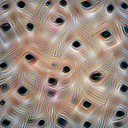

In [4]:
# Let's visualize another neuron using a more explicit objective:

obj = objectives.channel("mixed4a_pre_relu", 12)
_ = render.render_vis(model, obj)

512 1604.3142



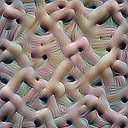

In [5]:

# Or we could do something weirder:
# (Technically, objectives are a class that implements addition.)
# Chose all neurons excited by human features
channel = lambda n: objectives.channel("mixed4a_pre_relu", n)
obj = channel(0) + channel(12)
_ = render.render_vis(model, obj)

In [6]:

neuron1 = ('mixed4b_pre_relu', 111)     # large fluffy
# neuron1 = ('mixed3a_pre_relu', 139)   # pointilist
# neuron1 = ('mixed3b_pre_relu',  81)   # brush trokes
# neuron1 = ('mixed4a_pre_relu',  97)   # wavy
# neuron1 = ('mixed4a_pre_relu',  41)   # frames
# neuron1 = ('mixed4a_pre_relu', 479)   # B/W

neuron2 = ('mixed4a_pre_relu', 476)     # art
# neuron2 = ('mixed4b_pre_relu', 360)   # lattices
# neuron2 = ('mixed4b_pre_relu', 482)   # arcs
# neuron2 = ('mixed4c_pre_relu', 440)   # small fluffy
# neuron2 = ('mixed4d_pre_relu', 479)   # bird beaks
# neuron2 = ('mixed4e_pre_relu', 718)   # shoulders

512 760.67535



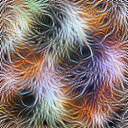

512 1272.653



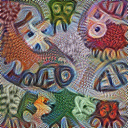

512 1311.4133



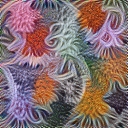

In [7]:
C = lambda neuron: objectives.channel(*neuron)

_ = render.render_vis(model, C(neuron1))
_ = render.render_vis(model, C(neuron2))
_ = render.render_vis(model, C(neuron1) + C(neuron2))